In [1]:
# OIBSIP
# TASK 1         : Iris flower classification
# AUTHOR         : Shreyas Ghodekar
# MODEL          : KMEANS
# TECHNIQUE USED : CLUSTERING

In [2]:
# Importing
# 1. Modules required
# 2. Iris Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.shape

(150, 6)

In [8]:
# Creating a dataframe which contains factors to form clusters

In [9]:
X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
X=X.values

In [11]:
type(X)

numpy.ndarray

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
# We will generate a plot to display the clusters formed by the model.

In [18]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(X)
pred=model.predict(X)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


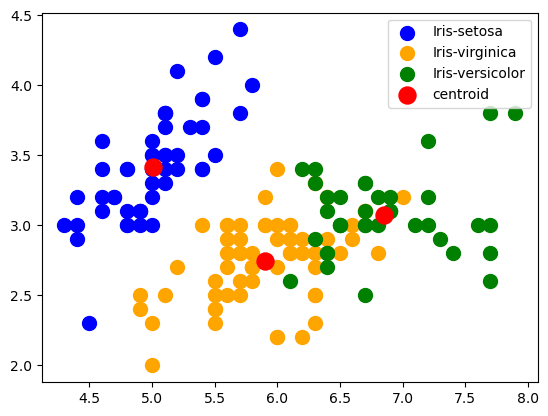

In [19]:
plt.scatter(X[pred==0,0],X[pred==0,1],c='blue',label='Iris-setosa',s=100)
plt.scatter(X[pred==1,0],X[pred==1,1],c='orange',label='Iris-virginica',s=100)
plt.scatter(X[pred==2,0],X[pred==2,1],c='green',label='Iris-versicolor',s=100)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='red',s=150,label='centroid')
plt.legend()
plt.show()

In [20]:
# In order to improve clustering and facilitate training, we will scale the data

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [22]:
pp=pipeline.predict(X)

In [23]:
# We will visually represent the clusters formed after scaling the data

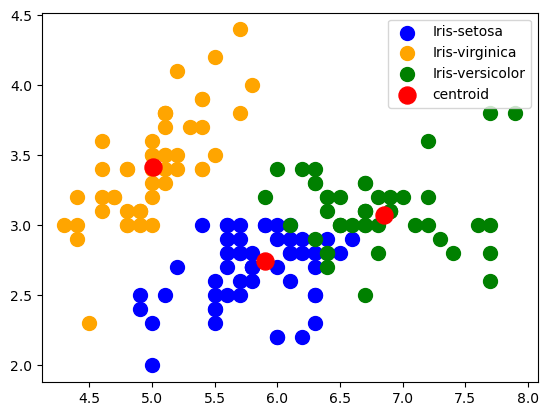

In [24]:
plt.scatter(X[pp==0,0],X[pp==0,1],c='blue',label='Iris-setosa',s=100)
plt.scatter(X[pp==1,0],X[pp==1,1],c='orange',label='Iris-virginica',s=100)
plt.scatter(X[pp==2,0],X[pp==2,1],c='green',label='Iris-versicolor',s=100)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='red',s=150,label='centroid')
plt.legend()
plt.show()

In [25]:
# As we can see the clustering is better than the previous one

In [26]:
# Conclusion : A model was created and its ideal no of clusters was found and impovised by scaling the Data for better Clustering.